# Reading the dataset

In [1]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# reading the output dataframes

data = pd.read_csv("Output_ARIMA.csv")

data.tail()

,Unnamed: 0,pred_vals,obs
13,131,4575.219255,4558.0
14,132,4627.628397,4606.2
15,133,4534.361124,4512.7
16,134,4516.382818,4435.2
17,135,4554.711395,4569.6


In [3]:
df = pd.read_csv("Output_RNN.csv")

len(df)

18

In [4]:
# adding the RNN outputs

data['pred_rnn'] = df['0']

In [5]:
data.head()

,Unnamed: 0,pred_vals,obs,pred_rnn
0,118,4391.776760,4379.3,4391.746582
1,119,4434.989031,4429.5,4445.021973
2,120,4487.398173,4479.9,4459.693848
3,121,4394.130901,4395.5,4434.780762
4,122,4376.152595,4380.6,4430.469727


# Plotting predictions 

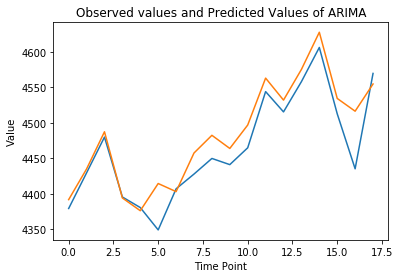

In [6]:
# plot of observed values and predicted values of ARIMA

plt.plot(data['obs'])
plt.plot(data['pred_vals'])
plt.xlabel("Time Point")
plt.ylabel("Value")
plt.title("Observed values and Predicted Values of ARIMA")
plt.show()

Here, the blue line is the observed value, and the orange line are the values predicted by ARIMA.

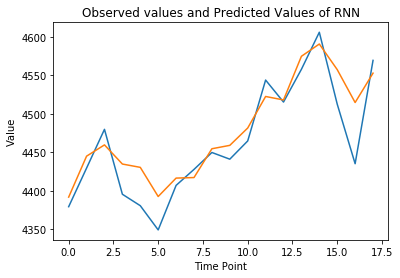

In [7]:
# plot of observed values and predicted values of ARIMA

plt.plot(data['obs'])
plt.plot(data['pred_rnn'])
plt.xlabel("Time Point")
plt.ylabel("Value")
plt.title("Observed values and Predicted Values of RNN")
plt.show()

Here, the blue line is the observed value, and the orange line are the values predicted by RNN.

It is observed that ARIMA has been able to better undertsand the structure of the time series.

# Residuals

In [8]:
# residuals of ARIMA

res_ar = data['obs'] - data['pred_vals']

In [9]:
#residuals of RNN

res_rnn = data['obs'] - data['pred_rnn']

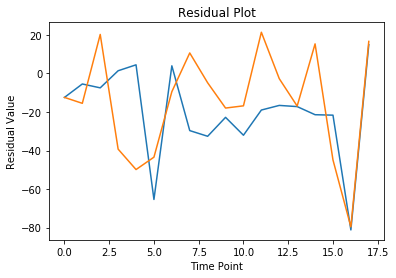

In [10]:
# residual plot

plt.plot(res_ar)
plt.plot(res_rnn)
plt.xlabel("Time Point")
plt.ylabel("Residual Value")
plt.title("Residual Plot")
plt.show()

A plot of the residuals shows a systematic pattern in that of RNN, which is not that prevalent in ARIMA.

In [11]:
# import seaborn library for the kdeplot

import seaborn as sns

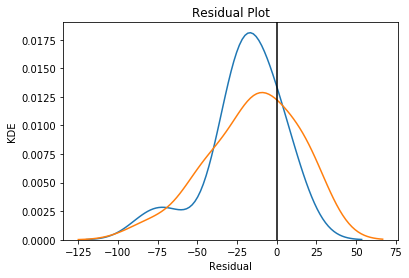

In [12]:
# kdeplot 

sns.kdeplot(res_ar)
sns.kdeplot(res_rnn)
plt.axvline(color='black')
plt.xlabel("Residual")
plt.ylabel("KDE")
plt.title("Residual Plot")
plt.show()


The blue line represents the errors of the ARIMA and orange the errors of RNN. 

Both of the distributions are negatively skewed. However, the peak in case of ARIMA lies closer to 0. 

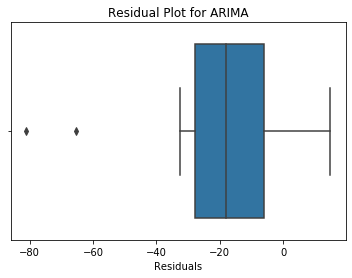

In [13]:
# boxplot of residuals of ARIMA

sns.boxplot(res_ar)
plt.xlabel("Residuals")
plt.title("Residual Plot for ARIMA")
plt.show()

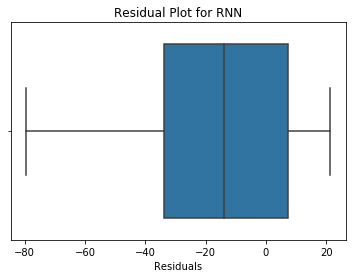

In [14]:
# boxplot of residuals of RNN

sns.boxplot(res_rnn)
plt.xlabel("Residuals")
plt.title("Residual Plot for RNN")
plt.show()

It is observed that although the mean of residuals of RNN lies closer to 0, but it varies much more than that of ARIMA. 

# Accuracy measures

In [15]:
import numpy as np

## Mean squared error

In [16]:
mse_ar = np.mean(res_ar*res_ar)
mse_ar

928.8972361831493

In [17]:
mse_rnn = np.mean(res_rnn*res_rnn)
mse_rnn

953.6204668860937

# Mean absolute  percentage error

In [18]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [19]:
mean_absolute_percentage_error(np.array(data['obs']), np.array(data['pred_vals']))

0.5111842798995636

In [21]:
mean_absolute_percentage_error(np.array(data['obs']), np.array(data['pred_rnn']))

0.5472004512271987

## Mean absolute Scaled Error

In [42]:
def _error(actual: np.ndarray, predicted: np.ndarray):
    """ Simple error """
    return actual - predicted

def _naive_forecasting(actual: np.ndarray, seasonality: int = 1):
    """ Naive forecasting method which just repeats previous samples """
    return actual[:-seasonality]

def mae(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Absolute Error """
    return np.mean(np.abs(_error(actual, predicted)))

In [43]:
def mase(actual: np.ndarray, predicted: np.ndarray, seasonality: int = 1):
    """
    Mean Absolute Scaled Error
    Baseline (benchmark) is computed with naive forecasting (shifted by @seasonality)
    """
    return mae(actual, predicted) / mae(actual[seasonality:], _naive_forecasting(actual, seasonality))

In [44]:
mase(np.array(data['obs']), np.array(data['pred_vals']), 12)

0.17438614203068661

In [45]:
mase(np.array(data['obs']), np.array(data['pred_rnn']), 12)

0.1863943430530727

According to the 3 measures, ARIMA is slightly better than RNN.